In [87]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneGroupOut, StratifiedShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import permutation_test_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from collections import Counter
from scipy import stats
%matplotlib inline

# Import dataset and preprocessing 

In [35]:
os.chdir("../2_Data")

In [36]:
df1 = pd.read_csv("Exp1_postpro.csv")
df2 = pd.read_csv("Exp2_postpro.csv")

In [37]:
df1['matchness'] = df1["matchness"].map(dict(mismatch=0, match=1))
df1['rt'] = np.log(df1['rt'])
df2['matchness'] = df2["matchness"].map(dict(mismatch=0, match=1))
df2['rt'] = np.log(df2['rt'])

In [38]:
df1.head()

,subj_idx,gender,year,education,dist,trial_type,rt,response,key_press,condition,correct_response,correct,word,Image,shape_en,valence,ACC,exp,matchness,trial_id
0,1,0,2000,5,434.97,psychophysics,6.773080,f,f,image_first,f,True,三角,img/C_ambi40.png,circle,triangle,1,exp1,0,1
1,1,0,2000,5,434.97,psychophysics,6.507278,j,j,image_first,j,True,圆形,img/C_ambi40.png,circle,circle,1,exp1,1,2
2,1,0,2000,5,434.97,psychophysics,6.386879,j,j,image_first,j,True,三角,img/T_ambi40.png,triangle,triangle,1,exp1,1,3
3,1,0,2000,5,434.97,psychophysics,6.469250,f,f,image_first,f,True,圆形,img/S_ambi40.png,square,circle,1,exp1,0,4
4,1,0,2000,5,434.97,psychophysics,6.350886,j,j,image_first,j,True,方形,img/S_ambi40.png,square,square,1,exp1,1,5


In [39]:
df2.head()

,subj_idx,gender,year,education,dist,trial_type,rt,response,key_press,condition,correct_response,correct,word,Image,shape_en,valence,ACC,exp,matchness,trial_id
0,1,0,2000,5,408.81,psychophysics,6.711740,f,f,image_first,f,True,常人,img/S_ambi40.png,square,Neutral,1,exp2,0,1
1,1,0,2000,5,408.81,psychophysics,6.608001,f,f,image_first,f,True,好人,img/T_ambi40.png,triangle,Good,1,exp2,0,2
2,1,0,2000,5,408.81,psychophysics,6.660575,j,j,image_first,j,True,常人,img/T_ambi40.png,triangle,Neutral,1,exp2,1,3
3,1,0,2000,5,408.81,psychophysics,6.526495,f,f,image_first,f,True,坏人,img/C_ambi40.png,circle,Bad,1,exp2,0,4
4,1,0,2000,5,408.81,psychophysics,6.395262,j,j,image_first,j,True,常人,img/T_ambi40.png,triangle,Neutral,1,exp2,1,5


## 7-trial back to both Exp1 and Exp2 data

In [40]:
save_df1 = pd.DataFrame() # 设置一个空DataFrame
group = df1.groupby(["subj_idx", "condition"]) # 分组
n1 = 1 # 设置要回溯几层
n2 = 2
n3 = 3
n4 = 4
n5 = 5
n6 = 6
n7 = 7


for i in group:
    op_group = i[1]
 #setting new name of trial-back rt    
    new_col_rt1 = f"rt_{n1}"
    new_col_rt2 = f"rt_{n2}"
    new_col_rt3 = f"rt_{n3}"
    new_col_rt4 = f"rt_{n4}"
    new_col_rt5 = f"rt_{n5}"
    new_col_rt6 = f"rt_{n6}"
    new_col_rt7 = f"rt_{n7}"
# setting new name of trial-back acc
    new_col_acc1 = f"ACC_{n1}"
    new_col_acc2 = f"ACC_{n2}"
    new_col_acc3 = f"ACC_{n3}"
    new_col_acc4 = f"ACC_{n4}"
    new_col_acc5 = f"ACC_{n5}"
    new_col_acc6 = f"ACC_{n6}"
    new_col_acc7 = f"ACC_{n7}"
# setting new name of trial-back valence
    new_col_v1 = f"valence_{n1}"
    new_col_v2 = f"valence_{n2}"
    new_col_v3 = f"valence_{n3}"
    new_col_v4 = f"valence_{n4}"
    new_col_v5 = f"valence_{n5}"
    new_col_v6 = f"valence_{n6}"
    new_col_v7 = f"valence_{n7}"

    op_group[new_col_rt1] = op_group["rt"].shift(n1)
    op_group[new_col_rt2] = op_group["rt"].shift(n2)
    op_group[new_col_rt3] = op_group["rt"].shift(n3)
    op_group[new_col_rt4] = op_group["rt"].shift(n4)
    op_group[new_col_rt5] = op_group["rt"].shift(n5)
    op_group[new_col_rt6] = op_group["rt"].shift(n6)
    op_group[new_col_rt7] = op_group["rt"].shift(n7)

    op_group[new_col_acc1] = op_group["ACC"].shift(n1)
    op_group[new_col_acc2] = op_group["ACC"].shift(n2)
    op_group[new_col_acc3] = op_group["ACC"].shift(n3)
    op_group[new_col_acc4] = op_group["ACC"].shift(n4)
    op_group[new_col_acc5] = op_group["ACC"].shift(n5)
    op_group[new_col_acc6] = op_group["ACC"].shift(n6)
    op_group[new_col_acc7] = op_group["ACC"].shift(n7)

    op_group[new_col_v1] = op_group["valence"].shift(n1)
    op_group[new_col_v2] = op_group["valence"].shift(n2)
    op_group[new_col_v3] = op_group["valence"].shift(n3)
    op_group[new_col_v4] = op_group["valence"].shift(n4)
    op_group[new_col_v5] = op_group["valence"].shift(n5)
    op_group[new_col_v6] = op_group["valence"].shift(n6)
    op_group[new_col_v7] = op_group["valence"].shift(n7)
    op_group.dropna(inplace=True) # 删除空值对应的行
    #op_group.dropna(inplace=True) # 删除空值对应的行
    
    save_df1 = pd.concat((save_df1, op_group)) # 将每次的结果与save_df合并起来



In [41]:
save_df1.to_csv("df1.csv")

In [42]:
save_df1.head(10)

,subj_idx,gender,year,education,dist,trial_type,rt,response,key_press,condition,...,ACC_5,ACC_6,ACC_7,valence_1,valence_2,valence_3,valence_4,valence_5,valence_6,valence_7
7,1,0,2000,5,434.97,psychophysics,6.352629,j,j,image_first,...,1.0,1.0,1.0,square,triangle,square,circle,triangle,circle,triangle
8,1,0,2000,5,434.97,psychophysics,6.415097,f,f,image_first,...,1.0,1.0,1.0,square,square,triangle,square,circle,triangle,circle
9,1,0,2000,5,434.97,psychophysics,6.519147,f,f,image_first,...,1.0,1.0,1.0,square,square,square,triangle,square,circle,triangle
10,1,0,2000,5,434.97,psychophysics,6.359574,j,j,image_first,...,1.0,1.0,1.0,circle,square,square,square,triangle,square,circle
11,1,0,2000,5,434.97,psychophysics,6.350886,f,f,image_first,...,1.0,1.0,1.0,circle,circle,square,square,square,triangle,square
12,1,0,2000,5,434.97,psychophysics,6.345636,j,j,image_first,...,1.0,1.0,1.0,triangle,circle,circle,square,square,square,triangle
13,1,0,2000,5,434.97,psychophysics,6.322565,j,j,image_first,...,1.0,1.0,1.0,triangle,triangle,circle,circle,square,square,square
14,1,0,2000,5,434.97,psychophysics,6.320768,f,f,image_first,...,1.0,1.0,1.0,triangle,triangle,triangle,circle,circle,square,square
15,1,0,2000,5,434.97,psychophysics,6.324359,j,j,image_first,...,1.0,1.0,1.0,triangle,triangle,triangle,triangle,circle,circle,square
16,1,0,2000,5,434.97,psychophysics,6.516193,f,f,image_first,...,1.0,1.0,1.0,circle,triangle,triangle,triangle,triangle,circle,circle


In [43]:
save_df2 = pd.DataFrame() # 设置一个空DataFrame
group2 = df2.groupby(["subj_idx", "condition"]) # 分组
n1 = 1 # 设置要回溯几层
n2 = 2
n3 = 3
n4 = 4
n5 = 5
n6 = 6
n7 = 7


for i in group2:
    op_group = i[1]
 #setting new name of trial-back rt    
    new_col_rt1 = f"rt_{n1}"
    new_col_rt2 = f"rt_{n2}"
    new_col_rt3 = f"rt_{n3}"
    new_col_rt4 = f"rt_{n4}"
    new_col_rt5 = f"rt_{n5}"
    new_col_rt6 = f"rt_{n6}"
    new_col_rt7 = f"rt_{n7}"
# setting new name of trial-back acc
    new_col_acc1 = f"ACC_{n1}"
    new_col_acc2 = f"ACC_{n2}"
    new_col_acc3 = f"ACC_{n3}"
    new_col_acc4 = f"ACC_{n4}"
    new_col_acc5 = f"ACC_{n5}"
    new_col_acc6 = f"ACC_{n6}"
    new_col_acc7 = f"ACC_{n7}"
# setting new name of trial-back valence
    new_col_v1 = f"valence_{n1}"
    new_col_v2 = f"valence_{n2}"
    new_col_v3 = f"valence_{n3}"
    new_col_v4 = f"valence_{n4}"
    new_col_v5 = f"valence_{n5}"
    new_col_v6 = f"valence_{n6}"
    new_col_v7 = f"valence_{n7}"

    op_group[new_col_rt1] = op_group["rt"].shift(n1)
    op_group[new_col_rt2] = op_group["rt"].shift(n2)
    op_group[new_col_rt3] = op_group["rt"].shift(n3)
    op_group[new_col_rt4] = op_group["rt"].shift(n4)
    op_group[new_col_rt5] = op_group["rt"].shift(n5)
    op_group[new_col_rt6] = op_group["rt"].shift(n6)
    op_group[new_col_rt7] = op_group["rt"].shift(n7)

    op_group[new_col_acc1] = op_group["ACC"].shift(n1)
    op_group[new_col_acc2] = op_group["ACC"].shift(n2)
    op_group[new_col_acc3] = op_group["ACC"].shift(n3)
    op_group[new_col_acc4] = op_group["ACC"].shift(n4)
    op_group[new_col_acc5] = op_group["ACC"].shift(n5)
    op_group[new_col_acc6] = op_group["ACC"].shift(n6)
    op_group[new_col_acc7] = op_group["ACC"].shift(n7)

    op_group[new_col_v1] = op_group["valence"].shift(n1)
    op_group[new_col_v2] = op_group["valence"].shift(n2)
    op_group[new_col_v3] = op_group["valence"].shift(n3)
    op_group[new_col_v4] = op_group["valence"].shift(n4)
    op_group[new_col_v5] = op_group["valence"].shift(n5)
    op_group[new_col_v6] = op_group["valence"].shift(n6)
    op_group[new_col_v7] = op_group["valence"].shift(n7)
    op_group.dropna(inplace=True) # 删除空值对应的行
    #op_group.dropna(inplace=True) # 删除空值对应的行
    
    save_df2 = pd.concat((save_df2, op_group)) # 将每次的结果与save_df合并起来


In [44]:
save_df2.head(10)

,subj_idx,gender,year,education,dist,trial_type,rt,response,key_press,condition,...,ACC_5,ACC_6,ACC_7,valence_1,valence_2,valence_3,valence_4,valence_5,valence_6,valence_7
7,1,0,2000,5,408.81,psychophysics,6.584791,f,f,image_first,...,1.0,1.0,1.0,Bad,Good,Neutral,Bad,Neutral,Good,Neutral
8,1,0,2000,5,408.81,psychophysics,6.822197,j,j,image_first,...,1.0,1.0,1.0,Neutral,Bad,Good,Neutral,Bad,Neutral,Good
9,1,0,2000,5,408.81,psychophysics,6.594413,f,f,image_first,...,1.0,1.0,1.0,Good,Neutral,Bad,Good,Neutral,Bad,Neutral
10,1,0,2000,5,408.81,psychophysics,6.434547,j,j,image_first,...,1.0,1.0,1.0,Bad,Good,Neutral,Bad,Good,Neutral,Bad
11,1,0,2000,5,408.81,psychophysics,6.424869,j,j,image_first,...,1.0,1.0,1.0,Bad,Bad,Good,Neutral,Bad,Good,Neutral
12,1,0,2000,5,408.81,psychophysics,6.342121,j,j,image_first,...,1.0,1.0,1.0,Good,Bad,Bad,Good,Neutral,Bad,Good
13,1,0,2000,5,408.81,psychophysics,6.486161,f,f,image_first,...,1.0,1.0,1.0,Good,Good,Bad,Bad,Good,Neutral,Bad
14,1,0,2000,5,408.81,psychophysics,6.562444,f,f,image_first,...,1.0,1.0,1.0,Good,Good,Good,Bad,Bad,Good,Neutral
15,1,0,2000,5,408.81,psychophysics,6.274762,j,j,image_first,...,1.0,1.0,1.0,Bad,Good,Good,Good,Bad,Bad,Good
16,1,0,2000,5,408.81,psychophysics,6.678342,f,f,image_first,...,1.0,1.0,1.0,Neutral,Bad,Good,Good,Good,Bad,Bad


In [45]:
exp1 = save_df1
exp2 = save_df2

## Basic information

In [46]:
exp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27218 entries, 7 to 24959
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          27218 non-null  int64  
 1   gender            27218 non-null  int64  
 2   year              27218 non-null  int64  
 3   education         27218 non-null  int64  
 4   dist              27218 non-null  float64
 5   trial_type        27218 non-null  object 
 6   rt                27218 non-null  float64
 7   response          27218 non-null  object 
 8   key_press         27218 non-null  object 
 9   condition         27218 non-null  object 
 10  correct_response  27218 non-null  object 
 11  correct           27218 non-null  bool   
 12  word              27218 non-null  object 
 13  Image             27218 non-null  object 
 14  shape_en          27218 non-null  object 
 15  valence           27218 non-null  object 
 16  ACC               27218 non-null  int64 

In [47]:
exp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27142 entries, 7 to 24719
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          27142 non-null  int64  
 1   gender            27142 non-null  int64  
 2   year              27142 non-null  int64  
 3   education         27142 non-null  int64  
 4   dist              27142 non-null  float64
 5   trial_type        27142 non-null  object 
 6   rt                27142 non-null  float64
 7   response          27142 non-null  object 
 8   key_press         27142 non-null  object 
 9   condition         27142 non-null  object 
 10  correct_response  27142 non-null  object 
 11  correct           27142 non-null  bool   
 12  word              27142 non-null  object 
 13  Image             27142 non-null  object 
 14  shape_en          27142 non-null  object 
 15  valence           27142 non-null  object 
 16  ACC               27142 non-null  int64 

There is no Na in datasets

<AxesSubplot: >

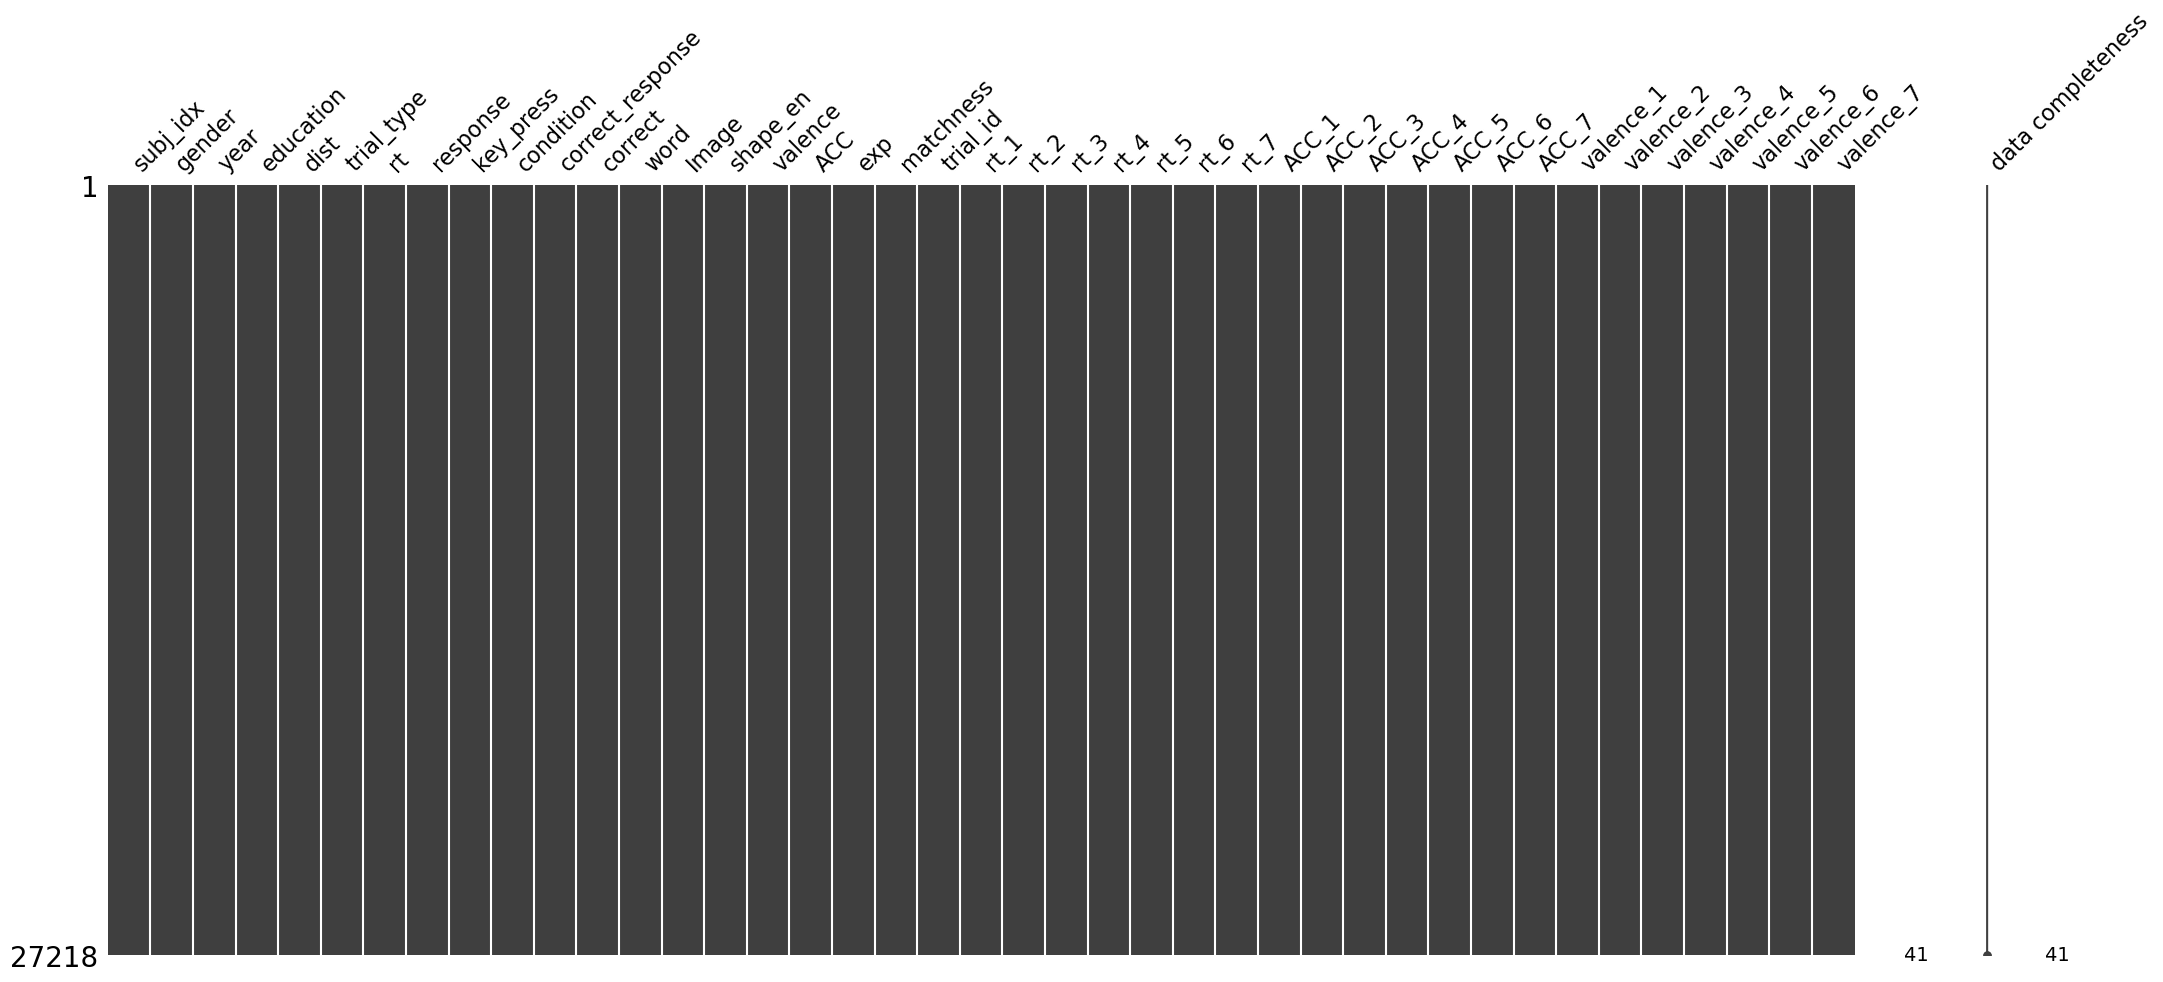

In [48]:
msno.matrix(exp1, labels=True)

<AxesSubplot: >

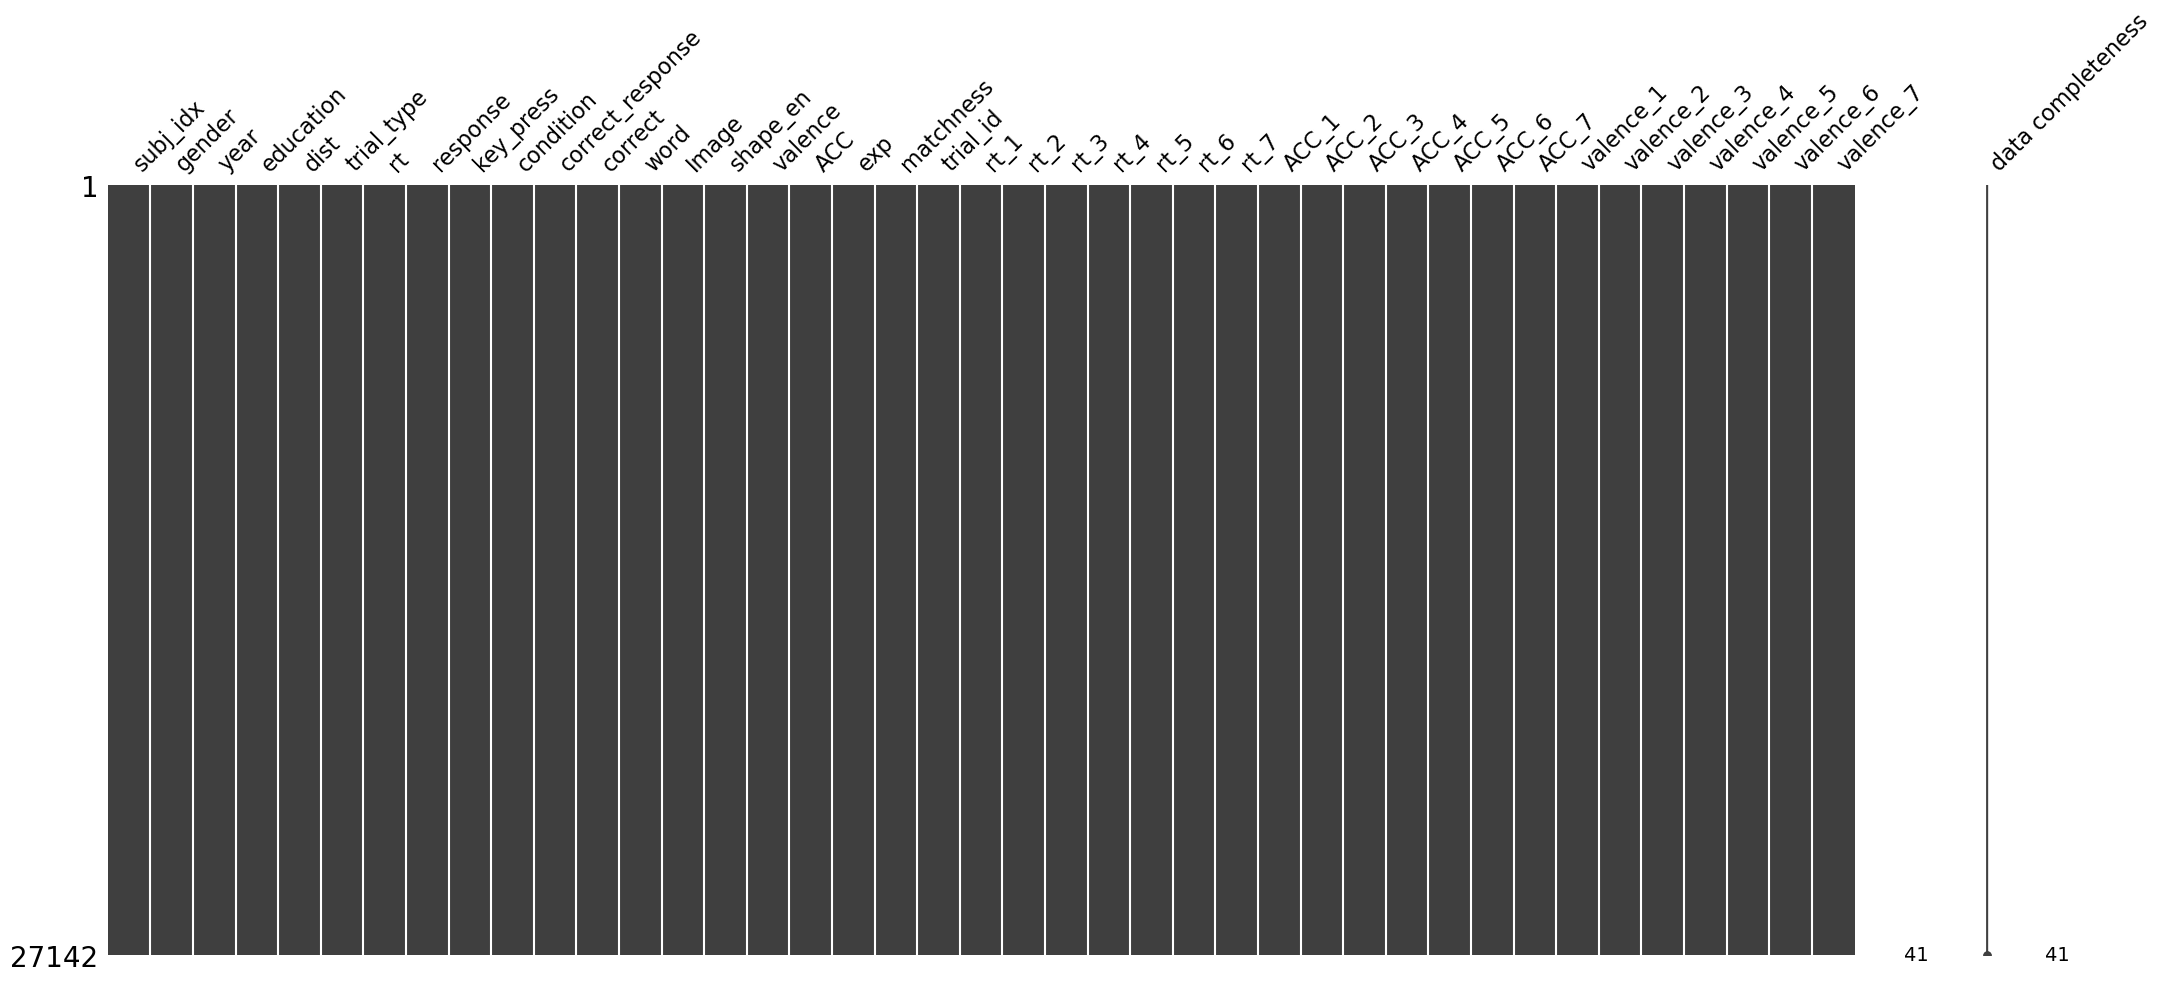

In [49]:
msno.matrix(exp2, labels=True)

One hot coding

In [50]:
onehot_v1 = pd.get_dummies(exp1[["valence", "valence_1", "valence_2", "valence_3", "valence_4", "valence_5", "valence_6", "valence_7"]])

In [51]:
exp1 = pd.concat([exp1, onehot_v1], axis=1)

In [52]:
exp1 = exp1.drop(["valence", "valence_1", "valence_2", "valence_3", "valence_4", "valence_5", "valence_6", "valence_7"], axis=1)

In [53]:
exp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27218 entries, 7 to 24959
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   subj_idx            27218 non-null  int64  
 1   gender              27218 non-null  int64  
 2   year                27218 non-null  int64  
 3   education           27218 non-null  int64  
 4   dist                27218 non-null  float64
 5   trial_type          27218 non-null  object 
 6   rt                  27218 non-null  float64
 7   response            27218 non-null  object 
 8   key_press           27218 non-null  object 
 9   condition           27218 non-null  object 
 10  correct_response    27218 non-null  object 
 11  correct             27218 non-null  bool   
 12  word                27218 non-null  object 
 13  Image               27218 non-null  object 
 14  shape_en            27218 non-null  object 
 15  ACC                 27218 non-null  int64  
 16  exp 

In [54]:
exp1.head(10)

,subj_idx,gender,year,education,dist,trial_type,rt,response,key_press,condition,...,valence_4_triangle,valence_5_circle,valence_5_square,valence_5_triangle,valence_6_circle,valence_6_square,valence_6_triangle,valence_7_circle,valence_7_square,valence_7_triangle
7,1,0,2000,5,434.97,psychophysics,6.352629,j,j,image_first,...,0,0,0,1,1,0,0,0,0,1
8,1,0,2000,5,434.97,psychophysics,6.415097,f,f,image_first,...,0,1,0,0,0,0,1,1,0,0
9,1,0,2000,5,434.97,psychophysics,6.519147,f,f,image_first,...,1,0,1,0,1,0,0,0,0,1
10,1,0,2000,5,434.97,psychophysics,6.359574,j,j,image_first,...,0,0,0,1,0,1,0,1,0,0
11,1,0,2000,5,434.97,psychophysics,6.350886,f,f,image_first,...,0,0,1,0,0,0,1,0,1,0
12,1,0,2000,5,434.97,psychophysics,6.345636,j,j,image_first,...,0,0,1,0,0,1,0,0,0,1
13,1,0,2000,5,434.97,psychophysics,6.322565,j,j,image_first,...,0,0,1,0,0,1,0,0,1,0
14,1,0,2000,5,434.97,psychophysics,6.320768,f,f,image_first,...,0,1,0,0,0,1,0,0,1,0
15,1,0,2000,5,434.97,psychophysics,6.324359,j,j,image_first,...,1,1,0,0,1,0,0,0,1,0
16,1,0,2000,5,434.97,psychophysics,6.516193,f,f,image_first,...,1,0,0,1,1,0,0,1,0,0


In [55]:
onehot_v2 = pd.get_dummies(exp2[["valence", "valence_1", "valence_2", "valence_3", "valence_4", "valence_5", "valence_6", "valence_7"]])

In [56]:
exp2 = pd.concat([exp2, onehot_v2], axis=1)

In [57]:
exp2 = exp2.drop(["valence", "valence_1", "valence_2", "valence_3", "valence_4", "valence_5", "valence_6", "valence_7"], axis=1)

In [58]:
exp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27142 entries, 7 to 24719
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subj_idx           27142 non-null  int64  
 1   gender             27142 non-null  int64  
 2   year               27142 non-null  int64  
 3   education          27142 non-null  int64  
 4   dist               27142 non-null  float64
 5   trial_type         27142 non-null  object 
 6   rt                 27142 non-null  float64
 7   response           27142 non-null  object 
 8   key_press          27142 non-null  object 
 9   condition          27142 non-null  object 
 10  correct_response   27142 non-null  object 
 11  correct            27142 non-null  bool   
 12  word               27142 non-null  object 
 13  Image              27142 non-null  object 
 14  shape_en           27142 non-null  object 
 15  ACC                27142 non-null  int64  
 16  exp                271

In [59]:
exp2.head(10)

,subj_idx,gender,year,education,dist,trial_type,rt,response,key_press,condition,...,valence_4_Neutral,valence_5_Bad,valence_5_Good,valence_5_Neutral,valence_6_Bad,valence_6_Good,valence_6_Neutral,valence_7_Bad,valence_7_Good,valence_7_Neutral
7,1,0,2000,5,408.81,psychophysics,6.584791,f,f,image_first,...,0,0,0,1,0,1,0,0,0,1
8,1,0,2000,5,408.81,psychophysics,6.822197,j,j,image_first,...,1,1,0,0,0,0,1,0,1,0
9,1,0,2000,5,408.81,psychophysics,6.594413,f,f,image_first,...,0,0,0,1,1,0,0,0,0,1
10,1,0,2000,5,408.81,psychophysics,6.434547,j,j,image_first,...,0,0,1,0,0,0,1,1,0,0
11,1,0,2000,5,408.81,psychophysics,6.424869,j,j,image_first,...,1,1,0,0,0,1,0,0,0,1
12,1,0,2000,5,408.81,psychophysics,6.342121,j,j,image_first,...,0,0,0,1,1,0,0,0,1,0
13,1,0,2000,5,408.81,psychophysics,6.486161,f,f,image_first,...,0,0,1,0,0,0,1,1,0,0
14,1,0,2000,5,408.81,psychophysics,6.562444,f,f,image_first,...,0,1,0,0,0,1,0,0,0,1
15,1,0,2000,5,408.81,psychophysics,6.274762,j,j,image_first,...,0,1,0,0,1,0,0,0,1,0
16,1,0,2000,5,408.81,psychophysics,6.678342,f,f,image_first,...,0,0,1,0,1,0,0,1,0,0


## Split the data by presentation(condition)

### Exp1

In [60]:
df1_sim = exp1[exp1.condition == "simultaneous"]
df1_word = exp1[exp1.condition == "word_first"]
df1_img = exp1[exp1.condition == "image_first"]

In [61]:
y1_sim = df1_sim["matchness"].values
y1_word = df1_word["matchness"].values
y1_img = df1_img["matchness"].values

#### feature

current trial

In [62]:
X1_sim = df1_sim[['rt', "ACC", "valence_circle", "valence_triangle", "valence_square"]].values
X1_word = df1_word[['rt', "ACC", "valence_circle", "valence_triangle", "valence_square"]].values
X1_img = df1_img[['rt', "ACC", "valence_circle", "valence_triangle", "valence_square"]].values


past trial

In [63]:
X1_sim_p = df1_sim[['rt_1', "ACC_1", "valence_1_circle", "valence_1_triangle", "valence_1_square", 
                    'rt_2', "ACC_2", "valence_2_circle", "valence_2_triangle", "valence_2_square", 
                    'rt_3', "ACC_3", "valence_3_circle", "valence_3_triangle", "valence_3_square", 
                    'rt_4', "ACC_4", "valence_4_circle", "valence_4_triangle", "valence_4_square", 
                    'rt_5', "ACC_5", "valence_5_circle", "valence_5_triangle", "valence_5_square", 
                    'rt_6', "ACC_6", "valence_6_circle", "valence_6_triangle", "valence_6_square", 
                    'rt_7', "ACC_7", "valence_7_circle", "valence_7_triangle", "valence_7_square"]].values

In [64]:
X1_img_p = df1_img[['rt_1', "ACC_1", "valence_1_circle", "valence_1_triangle", "valence_1_square", 
                    'rt_2', "ACC_2", "valence_2_circle", "valence_2_triangle", "valence_2_square", 
                    'rt_3', "ACC_3", "valence_3_circle", "valence_3_triangle", "valence_3_square", 
                    'rt_4', "ACC_4", "valence_4_circle", "valence_4_triangle", "valence_4_square", 
                    'rt_5', "ACC_5", "valence_5_circle", "valence_5_triangle", "valence_5_square", 
                    'rt_6', "ACC_6", "valence_6_circle", "valence_6_triangle", "valence_6_square", 
                    'rt_7', "ACC_7", "valence_7_circle", "valence_7_triangle", "valence_7_square"]].values

In [65]:
X1_word_p = df1_word[['rt_1', "ACC_1", "valence_1_circle", "valence_1_triangle", "valence_1_square", 
                    'rt_2', "ACC_2", "valence_2_circle", "valence_2_triangle", "valence_2_square", 
                    'rt_3', "ACC_3", "valence_3_circle", "valence_3_triangle", "valence_3_square", 
                    'rt_4', "ACC_4", "valence_4_circle", "valence_4_triangle", "valence_4_square", 
                    'rt_5', "ACC_5", "valence_5_circle", "valence_5_triangle", "valence_5_square", 
                    'rt_6', "ACC_6", "valence_6_circle", "valence_6_triangle", "valence_6_square", 
                    'rt_7', "ACC_7", "valence_7_circle", "valence_7_triangle", "valence_7_square"]].values

In [68]:
X1_word_p

array([[6.43935037, 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [6.40522846, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [6.41181827, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [6.30078579, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [6.09582456, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [6.45990445, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [69]:
from sklearn.linear_model import LogisticRegressionCV
groups_sim = df1_sim["subj_idx"].values
logo = LeaveOneGroupOut()

roc_auc_img1_p = []
roc_auc_word1_p = []
roc_auc_sim1_p = []

for train, test in logo.split(X1_sim_p, y1_sim, groups=groups_sim):
    test_sub = np.unique(groups_sim[test])[0]

    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    logi.fit(X=X1_sim_p[train], y=y1_sim[train])
    y_pre_sim1_p = logi.predict_proba(X1_sim_p[test])
    score_sim1_p = roc_auc_score(y1_sim[test], y_pre_sim1_p[:, -1])
    y_pred_img1_p = logi.predict_proba(X1_img_p[df1_img["subj_idx"] == test_sub])
    score_img1_p = roc_auc_score(y1_img[df1_img["subj_idx"] == test_sub], y_pred_img1_p[:, -1])
    y_pred_word1_p = logi.predict_proba(X1_word_p[df1_word["subj_idx"] == test_sub])
    score_word1_p = roc_auc_score(y1_word[df1_word["subj_idx"] == test_sub], y_pred_word1_p[:, -1])
    roc_auc_sim1_p.append(score_sim1_p)
    roc_auc_img1_p.append(score_img1_p)
    roc_auc_word1_p.append(score_word1_p)

In [70]:
print("The mean roc auc score of image_first is" , np.mean(roc_auc_img1_p))
print("The mean roc auc score of simultaneous is" , np.mean(roc_auc_sim1_p))
print("The mean roc auc score of word_first is" , np.mean(roc_auc_word1_p))

The mean roc auc score of image_first is 0.5098055925742779
The mean roc auc score of simultaneous is 0.5145388909873094
The mean roc auc score of word_first is 0.5140223304139051


In [72]:
groups_sim = df1_sim["subj_idx"].values
logo = LeaveOneGroupOut()

roc_auc_img1_p = []
roc_auc_word1_p = []
roc_auc_sim1_p = []

for train, test in logo.split(X1_sim_p, y1_sim, groups=groups_sim):
    test_sub = np.unique(groups_sim[test])[0]

    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    rf.fit(X=X1_sim_p[train], y=y1_sim[train])
    y_pre_sim1_p = rf.predict_proba(X1_sim_p[test])
    score_sim1_p = roc_auc_score(y1_sim[test], y_pre_sim1_p[:, -1])
    y_pred_img1_p = rf.predict_proba(X1_img_p[df1_img["subj_idx"] == test_sub])
    score_img1_p = roc_auc_score(y1_img[df1_img["subj_idx"] == test_sub], y_pred_img1_p[:, -1])
    y_pred_word1_p = rf.predict_proba(X1_word_p[df1_word["subj_idx"] == test_sub])
    score_word1_p = roc_auc_score(y1_word[df1_word["subj_idx"] == test_sub], y_pred_word1_p[:, -1])
    roc_auc_sim1_p.append(score_sim1_p)
    roc_auc_img1_p.append(score_img1_p)
    roc_auc_word1_p.append(score_word1_p)

In [73]:
print("The mean roc auc score of image_first is" , np.mean(roc_auc_img1_p))
print("The mean roc auc score of simultaneous is" , np.mean(roc_auc_sim1_p))
print("The mean roc auc score of word_first is" , np.mean(roc_auc_word1_p))

The mean roc auc score of image_first is 0.5054524121612141
The mean roc auc score of simultaneous is 0.5007106775849115
The mean roc auc score of word_first is 0.5026339006010924


In [76]:
X1 = exp1[['rt_1', "ACC_1", "valence_1_circle", "valence_1_triangle", "valence_1_square", 
                    'rt_2', "ACC_2", "valence_2_circle", "valence_2_triangle", "valence_2_square", 
                    'rt_3', "ACC_3", "valence_3_circle", "valence_3_triangle", "valence_3_square", 
                    'rt_4', "ACC_4", "valence_4_circle", "valence_4_triangle", "valence_4_square", 
                    'rt_5', "ACC_5", "valence_5_circle", "valence_5_triangle", "valence_5_square", 
                    'rt_6', "ACC_6", "valence_6_circle", "valence_6_triangle", "valence_6_square", 
                    'rt_7', "ACC_7", "valence_7_circle", "valence_7_triangle", "valence_7_square"]].values
y1 = exp1['matchness'].values

group_all = exp1['subj_idx'].values
logo = LeaveOneGroupOut()

In [79]:
logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))

In [82]:
score = cross_validate(logi, X1, y1, groups=group_all, cv=logo, scoring="roc_auc",n_jobs=-1)

In [85]:
score['test_score'].mean()

0.5139071628240506

# within subject, condition

In [100]:
#后续要分condition
df_result_s = dict(sub=[], score=[], fold=[], condition=[])
for sub in np.unique(groups_sim):
    idx_sub = groups_sim == sub
    feature_sub_sim = X1_sim_p[idx_sub]
    label_sub_sim = y1_sim[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    score = cross_validate(logi, feature_sub_sim, label_sub_sim, cv=cv, scoring="roc_auc",n_jobs=-1)
    for ii, s in enumerate(score["test_score"]):
        df_result_s["sub"].append(sub)  
        df_result_s["score"].append(s)
        df_result_s["fold"].append(ii)
        df_result_s["condition"].append("simultaneous")
df_result_s=pd.DataFrame(df_result_s)  

In [103]:
df_result_s

,sub,score,fold,condition
0,1,0.422101,0,simultaneous
1,1,0.579710,1,simultaneous
2,1,0.360507,2,simultaneous
3,1,0.489130,3,simultaneous
4,1,0.425725,4,simultaneous
...,...,...,...,...
395,40,0.454710,5,simultaneous
396,40,0.335145,6,simultaneous
397,40,0.418478,7,simultaneous
398,40,0.579710,8,simultaneous


In [105]:
#后续要分condition
groups_word = df1_word["subj_idx"].values
df_result_w = dict(sub=[], score=[], fold=[], condition=[])
for sub in np.unique(groups_word):
    idx_sub = groups_word == sub
    feature_sub_word = X1_word_p[idx_sub]
    label_sub_word = y1_word[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    score = cross_validate(logi, feature_sub_word, label_sub_word, cv=cv, scoring="roc_auc",n_jobs=-1)
    for ii, s in enumerate(score["test_score"]):
        df_result_w["sub"].append(sub)  
        df_result_w["score"].append(s)
        df_result_w["fold"].append(ii)
        df_result_w["condition"].append("Word_first")
df_result_w=pd.DataFrame(df_result_w)  

In [106]:
df_result_w

,sub,score,fold,condition
0,1,0.619565,0,Word_first
1,1,0.568841,1,Word_first
2,1,0.516304,2,Word_first
3,1,0.552536,3,Word_first
4,1,0.547101,4,Word_first
...,...,...,...,...
395,40,0.480072,5,Word_first
396,40,0.463768,6,Word_first
397,40,0.514493,7,Word_first
398,40,0.545290,8,Word_first


In [107]:
groups_img = df1_img["subj_idx"].values
df_result_i = dict(sub=[], score=[], fold=[], condition=[])
for sub in np.unique(groups_img):
    idx_sub = groups_img == sub
    feature_sub_img = X1_img_p[idx_sub]
    label_sub_img = y1_img[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    score = cross_validate(logi, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1)
    for ii, s in enumerate(score["test_score"]):
        df_result_i["sub"].append(sub)  
        df_result_i["score"].append(s)
        df_result_i["fold"].append(ii)
        df_result_i["condition"].append("Image_first")
df_result_i=pd.DataFrame(df_result_i)  

In [108]:
df_result_i

,sub,score,fold,condition
0,1,0.460145,0,Image_first
1,1,0.559783,1,Image_first
2,1,0.405797,2,Image_first
3,1,0.476449,3,Image_first
4,1,0.469203,4,Image_first
...,...,...,...,...
395,40,0.637681,5,Image_first
396,40,0.726449,6,Image_first
397,40,0.704710,7,Image_first
398,40,0.563406,8,Image_first


In [109]:
df_result = pd.concat([df_result_i, df_result_s, df_result_w])

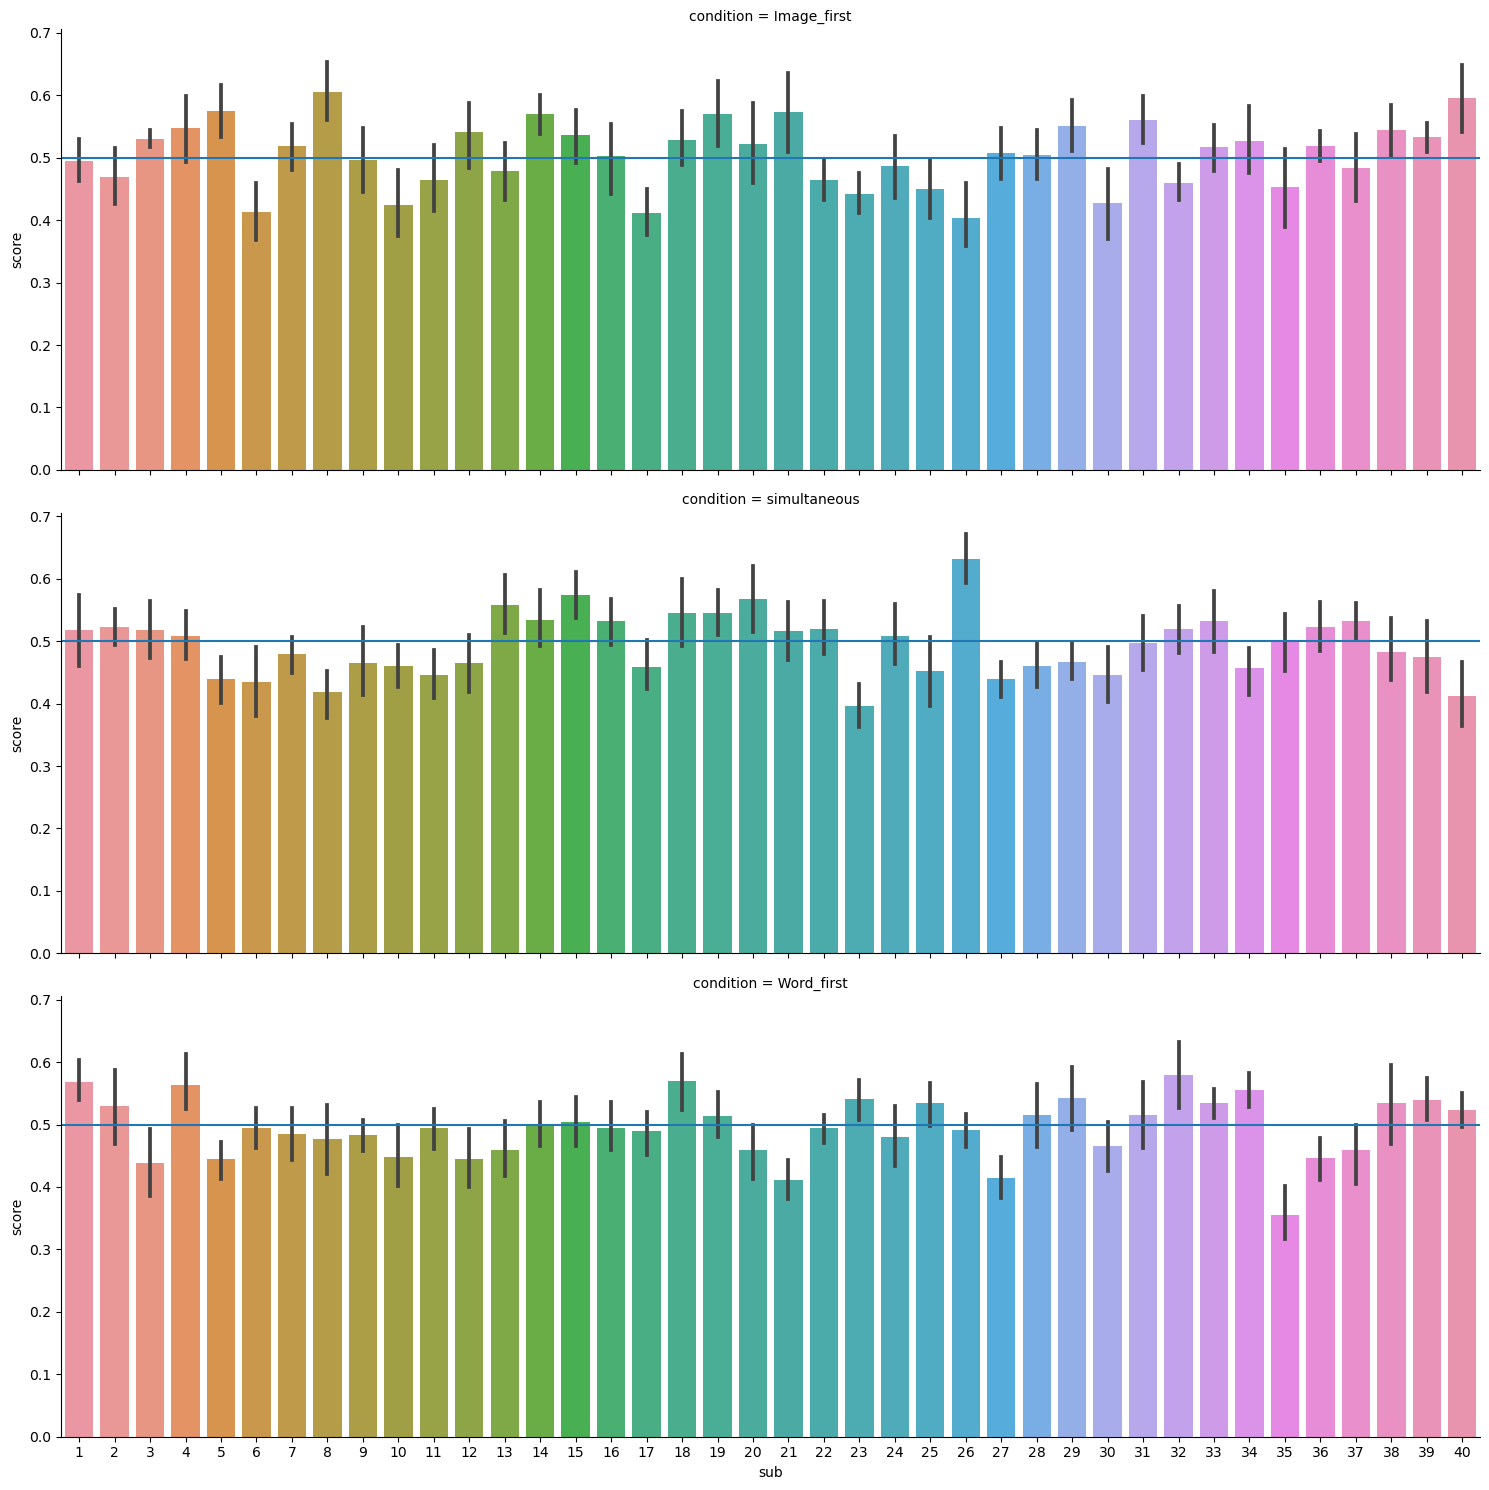

In [115]:
g = sns.catplot(x="sub", y="score", kind="bar", data=df_result, row="condition",aspect=3)
[ax.axhline(0.5) for ax in g.axes.flatten()]

# within sub, cross condition

In [117]:

groups_img = df1_img["subj_idx"].values
df_result_si = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups_img):
    idx_sub = groups_img == sub
    feature_sub_img = X1_img_p[idx_sub]
    label_sub_img = y1_img[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    score = cross_validate(logi, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result_si["sub"].append(sub)  
        df_result_si["score"].append(s)
        df_result_si["fold"].append(ii)
        df_result_si["source"].append("Image_first")
        df_result_si["target"].append("Image_first")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_w = y1_word[groups_word == sub]
        y_pred_w = estimator.predict_proba(X1_word_p[groups_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_result_si["sub"].append(sub)  
        df_result_si["score"].append(roc_w)
        df_result_si["fold"].append(ii)
        df_result_si["source"].append("Image_first")
        df_result_si["target"].append("Word_first")
        
        y_true_s = y1_sim[groups_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim_p[groups_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_result_si["sub"].append(sub)  
        df_result_si["score"].append(roc_s)
        df_result_si["fold"].append(ii)
        df_result_si["source"].append("Image_first")
        df_result_si["target"].append("Simultaneous")

df_result_si=pd.DataFrame(df_result_si)  

In [118]:
df_result_si

,sub,score,fold,source,target
0,1,0.504863,0,Image_first,Word_first
1,1,0.465591,0,Image_first,Simultaneous
2,1,0.482243,1,Image_first,Word_first
3,1,0.572281,1,Image_first,Simultaneous
4,1,0.494106,2,Image_first,Word_first
...,...,...,...,...,...
795,40,0.526230,7,Image_first,Simultaneous
796,40,0.478780,8,Image_first,Word_first
797,40,0.508989,8,Image_first,Simultaneous
798,40,0.465001,9,Image_first,Word_first


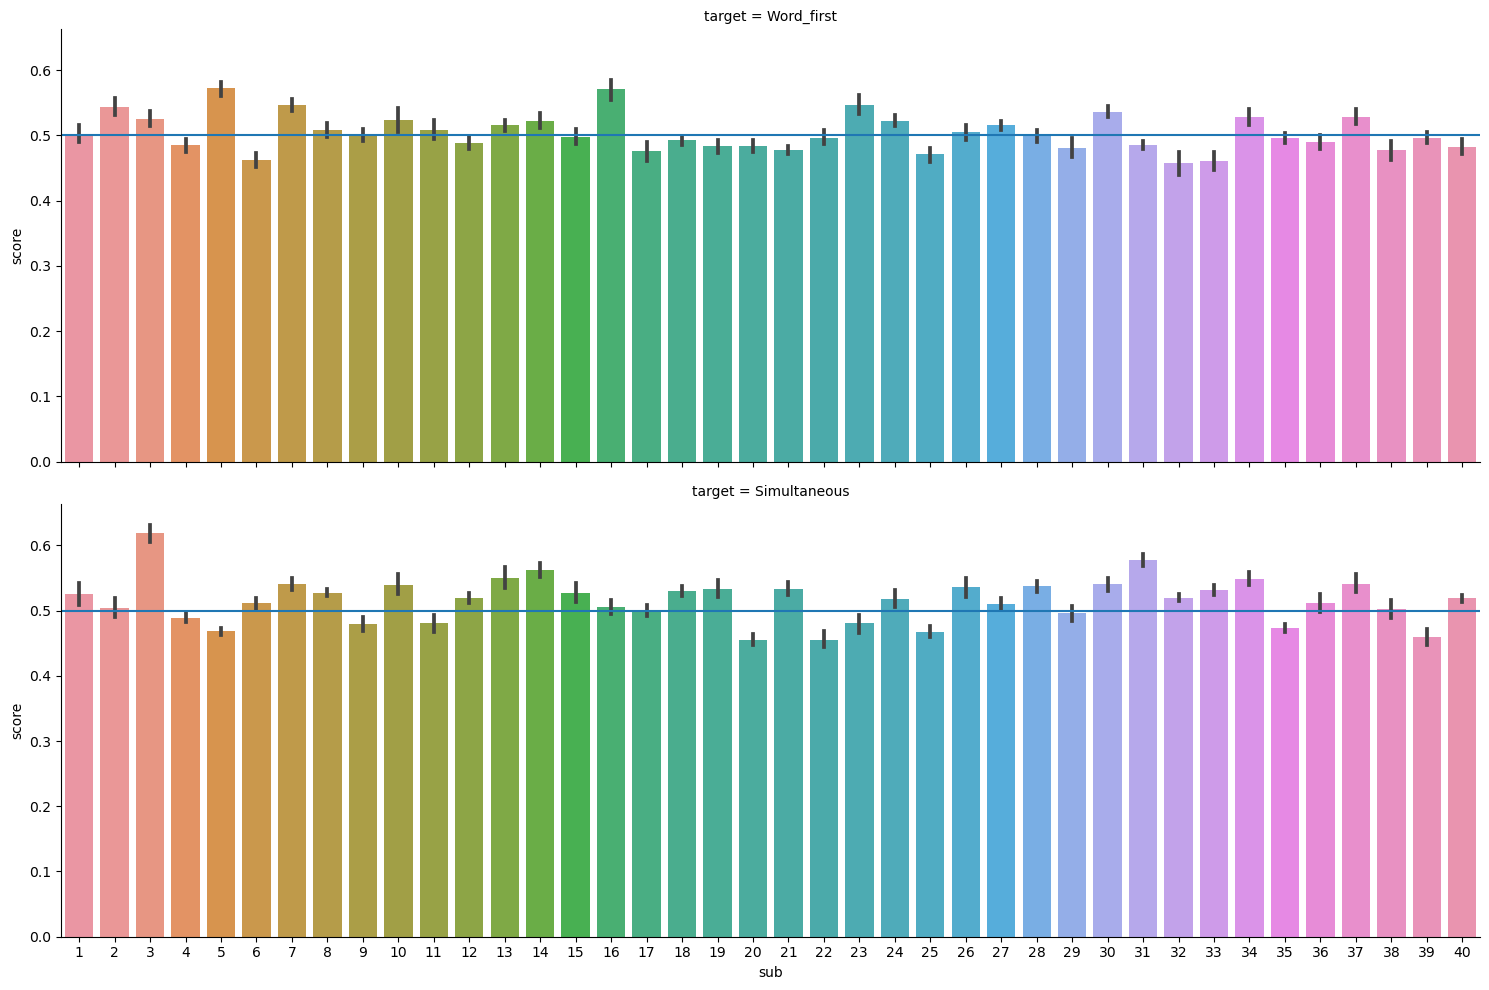

In [121]:
si = sns.catplot(x="sub", y="score", row="target", data=df_result_si, kind="bar", aspect=3)
[ax.axhline(0.5) for ax in si.axes.flatten()]